Silakan upload file CSV data minat baca.


Saving TGM 2020-2023_eng.csv to TGM 2020-2023_eng (5).csv

File 'TGM 2020-2023_eng (5).csv' berhasil dibaca. Jumlah baris awal: 140
Kolom yang terdeteksi: ['Provinsi', 'Year', 'Reading Frequency per week', 'Number of Readings per Quarter', 'Daily Reading Duration (in minutes)', 'Internet Access Frequency per Week', 'Daily Internet Duration (in minutes)', 'Tingkat Kegemaran Membaca (Reading Interest)', 'Category']

Statistik deskriptif awal:
                                              count        mean        std  \
Reading Frequency per week                    140.0    4.664286   0.601087   
Number of Readings per Quarter                140.0    4.221429   1.329347   
Daily Reading Duration (in minutes)           140.0   98.223571  12.042064   
Internet Access Frequency per Week            105.0    5.395238   0.603257   
Daily Internet Duration (in minutes)          105.0  113.378095  11.771731   
Tingkat Kegemaran Membaca (Reading Interest)  140.0   61.201000   6.286484   

        

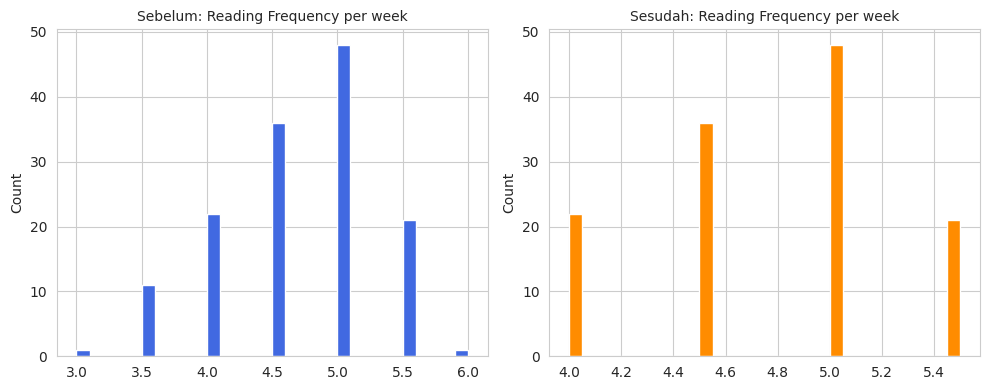

'Number of Readings per Quarter' -> Batas outlier: < -1.06 atau > 9.44


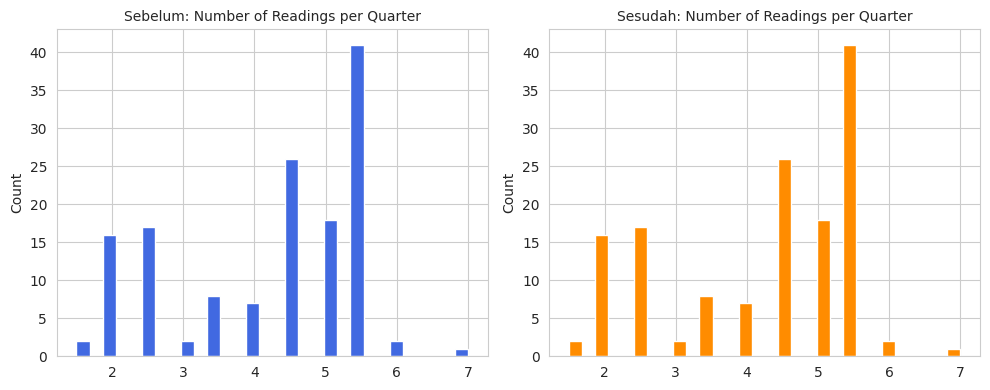

'Daily Reading Duration (in minutes)' -> Batas outlier: < 68.25 atau > 128.65


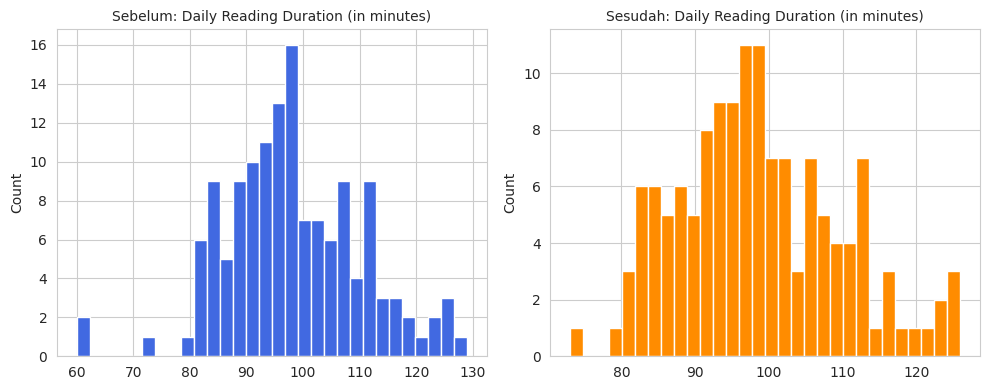

'Internet Access Frequency per Week' -> Batas outlier: < 4.25 atau > 6.25


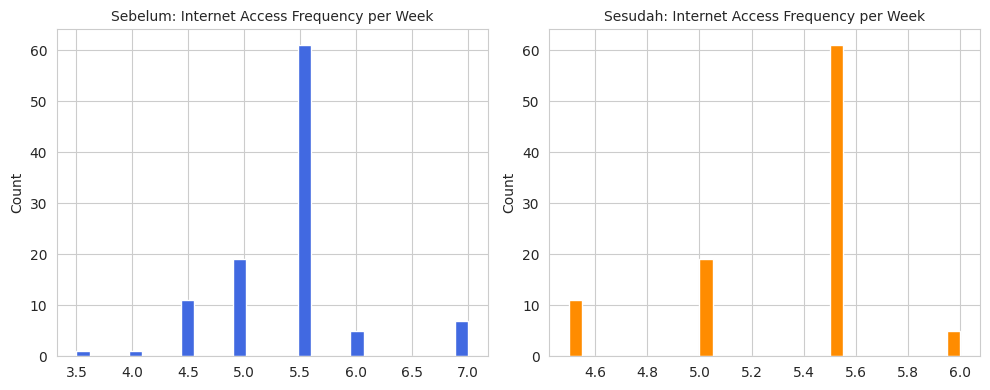

'Daily Internet Duration (in minutes)' -> Batas outlier: < 84.45 atau > 143.25


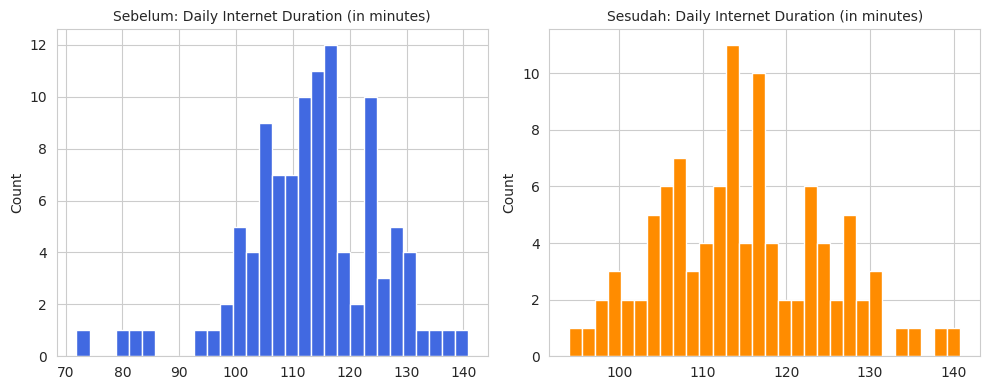

'Tingkat Kegemaran Membaca (Reading Interest)' -> Batas outlier: < 42.37 atau > 79.77


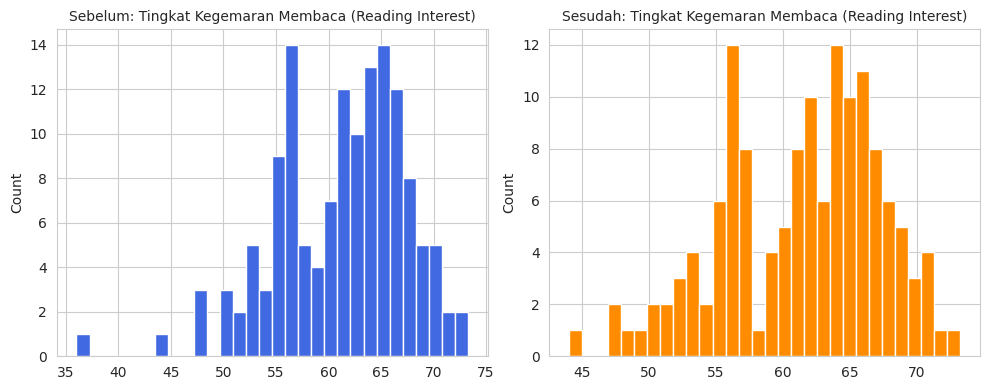


--- Hasil Akhir ---
Jumlah baris: awal = 140 | sesudah = 140

Statistik deskriptif setelah outlier dihapus:
                                              count        mean        std  \
Reading Frequency per week                    127.0    4.767717   0.483026   
Number of Readings per Quarter                140.0    4.221429   1.329347   
Daily Reading Duration (in minutes)           137.0   98.544526  10.981354   
Internet Access Frequency per Week             96.0    5.312500   0.378710   
Daily Internet Duration (in minutes)          101.0  114.718812   9.775773   
Tingkat Kegemaran Membaca (Reading Interest)  139.0   61.382230   5.930828   

                                                min      25%     50%      75%  \
Reading Frequency per week                     4.00    4.500    5.00    5.000   
Number of Readings per Quarter                 1.50    2.875    4.50    5.500   
Daily Reading Duration (in minutes)           73.00   91.000   97.40  106.000   
Internet Access Freq

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Hasil berhasil disimpan dan diunduh sebagai 'TGM_2020-2023_clean.csv' dan 'TGM_2020-2023_clean.xlsx'.
Gambar perbandingan histogram juga disimpan di direktori.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import re # UClean file name

print("Silakan upload file CSV data minat baca.")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# FIX: Specify semicolon as delimiter and comma as decimal separator
df = pd.read_csv(filename, encoding="utf-8-sig", sep=";", decimal=",", na_values=["NA", "N/A", ""])
print(f"\nFile '{filename}' berhasil dibaca. Jumlah baris awal: {len(df)}")
print("Kolom yang terdeteksi:", list(df.columns))

numeric_cols_candidate = [
    "Reading Frequency per week",
    "Number of Readings per Quarter",
    "Daily Reading Duration (in minutes)",
    "Internet Access Frequency per Week",
    "Daily Internet Duration (in minutes)",
    "Tingkat Kegemaran Membaca (Reading Interest)",
]
numeric_cols = [col for col in numeric_cols_candidate if col in df.columns]

# Remove manual conversion as decimal=',' handles it
# for col in numeric_cols:
#     df[col] = pd.to_numeric(
#         df[col].astype(str).str.replace(",", ".", regex=False),
#         errors="coerce" # Jika gagal konversi, jadikan NaN
#     )


print("\nStatistik deskriptif awal:")
print(df[numeric_cols].describe().T)

df_clean = df.copy()

print("\n--- Memulai Proses Penghapusan Outlier ---")
for col in numeric_cols:
    # Hitung batas IQR, abaikan NaN
    q1, q3 = df_clean[col].quantile(0.25), df_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"'{col}' -> Batas outlier: < {lower_bound:.2f} atau > {upper_bound:.2f}")

    # Buat nama file yang aman dari nama kolom
    safe_col_name = re.sub(r'[\s\(\)]', '_', col).lower().strip('_')

    # Plot SEBELUM
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df_clean[col].hist(bins=30, color='royalblue')
    plt.title(f'Sebelum: {col}', fontsize=10)
    plt.xlabel(''); plt.ylabel('Count')

    # Filter outlier (biarkan NaN tetap ada)
    is_outlier = ~df_clean[col].between(lower_bound, upper_bound)
    df_clean.loc[is_outlier, col] = None # Ganti outlier dengan NaN agar tidak dihapus barisnya

    plt.subplot(1, 2, 2)
    df_clean[col].hist(bins=30, color='darkorange')
    plt.title(f'Sesudah: {col}', fontsize=10)
    plt.xlabel(''); plt.ylabel('Count')

    plt.tight_layout()
    plt.savefig(f"hist_comparison_{safe_col_name}.png")
    plt.show()


# --- 4. Ringkasan & Simpan Hasil ---
# Baris yang dihapus adalah baris yang menjadi NaN di SEMUA kolom numerik
df_final = df_clean.dropna(subset=numeric_cols, how='all')

print("\n--- Hasil Akhir ---")
print(f"Jumlah baris: awal = {len(df)} | sesudah = {len(df_final)}")
print("\nStatistik deskriptif setelah outlier dihapus:")
print(df_final[numeric_cols].describe().T)

# Simpan ke file
output_csv = "TGM_2020-2023_clean.csv"
output_xlsx = "TGM_2020-2023_clean.xlsx"
df_final.to_csv(output_csv, index=False)
df_final.to_excel(output_xlsx, index=False)

# Download hasil (hanya jalan di Google Colab)
files.download(output_csv)
files.download(output_xlsx)

print(f"\nHasil berhasil disimpan dan diunduh sebagai '{output_csv}' dan '{output_xlsx}'.")
print("Gambar perbandingan histogram juga disimpan di direktori.")